In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
# Load the dataset
df=pd.read_csv('E:\Price_Predictorrr-main\Price_Predictorrr-main\lgtv.csv')
df


,Description,Days,Price,AvailableOn,Rating,Comment
0,Flipkart Perfect Homes Riobo Engineered Wood T...,1.0,4507.0,Flipkart,5,thank you very much flipkart sUuuuuuuper dinin...
1,Material: Particle Board,2.0,4987.0,Flipkart,5,"Compact yet spacious as you sit on corners, so..."
2,W x H x D: 120 cm x 45 cm x 39.5 cm (3 ft 11 i...,3.0,4255.0,Flipkart,5,beyond expectation.superb thanks flipkart to h...
3,Ideal TV Size: 43 inch,4.0,4494.0,Amazon,5,perfect dining table for a small family. the d...
4,"Number of Drawers: 0, Number of Open Shelves: ...",5.0,4178.0,Amazon,4,i am giving this r view after mostly 1 month o...
...,...,...,...,...,...,...
415,NaN,NaN,NaN,NaN,5,price worthy
416,NaN,NaN,NaN,NaN,3,finishing is good but the door hand is local p...
417,NaN,NaN,NaN,NaN,5,"service very good, Good Item, very usable product"
418,NaN,NaN,NaN,NaN,3,Product is good but installation not done on t...


In [6]:
# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

# Check for invalid values
print(df.describe())

# Remove rows with extremely large or invalid values
df = df[df['Price'] < 1e6]  # Adjust the threshold value as per your dataset

Description    414
Days            55
Price           55
AvailableOn     55
Rating           0
Comment          0
dtype: int64
           Days       Price    Rating
count  6.000000     6.00000  6.000000
mean   3.500000  4503.50000  4.833333
std    1.870829   286.66688  0.408248
min    1.000000  4178.00000  4.000000
25%    2.250000  4314.75000  5.000000
50%    3.500000  4500.50000  5.000000
75%    4.750000  4576.75000  5.000000
max    6.000000  4987.00000  5.000000


In [8]:
# Prepare the data
X = df['Days'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)
description = df['Description']
rating = df['Rating']
comment = df['Comment']
available_on = df['AvailableOn']

In [9]:
# Create the linear regression model
model = LinearRegression()

In [10]:
# Fit the model to the data
model.fit(X, y)


LinearRegression()

In [11]:
# Predict the prices for the given days
predicted_prices = model.predict(X)

In [12]:
# Find the best price and corresponding day
best_price_index = y.argmin()
best_day = X[best_price_index][0]
best_price = y[best_price_index][0]
best_description = description[best_price_index]
best_available_on = available_on[best_price_index]

# Check if the description is NaN, if so, fallback to the first line description
if pd.isnull(best_description):
    best_description = description.iloc[0]

best_review = comment[best_price_index]
best_rating = rating[best_price_index]

print("Best price: {} on day {}".format(best_price, best_day))
print("Description: ", best_description)
print("Review: ", best_review)
print("Rating: ", best_rating)
print("Available On: ", best_available_on)

Best price: 4178.0 on day 5.0
Description:  Number of Drawers: 0, Number of Open Shelves: 6, Number of Closed Shelves: 2
Review:  i am giving this r view after mostly 1 month of review. chairs are not sturdy i r ad in most of the review and saw that these are not capable of taking over 90kg of weight but as per my personal experience these can bear 100-110 kg of weight and these are sturdy but these are of less foam in seating area. so not comfortable for long seat. but table's glass is good in look wise but expected more thick as compared to pricing. table is not sturdy as it is tilting even after proper fitting. we ha.
Rating:  4
Available On:  Amazon


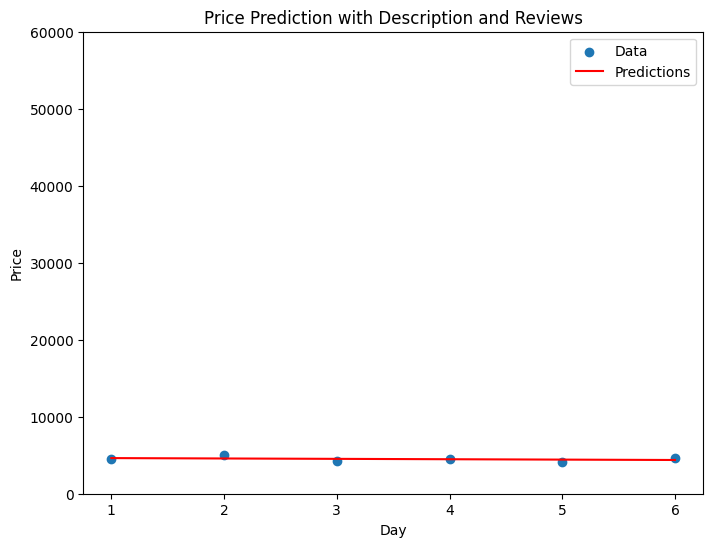

[[-7631.34285714]]


In [13]:
# Plot the data and the predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, predicted_prices, color='red', label='Predictions')
plt.ylim(0, 60000)
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Price Prediction with Description and Reviews')
plt.show()

print(model.predict([[250]]))

In [ ]:
import pickle

# Save the trained model
pickle.dump(model, open('tv.sav', 'wb'))
